In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

DEFINE STATE

In [17]:
class studentActivity(TypedDict):
    sleep: int
    Study: int
    readCourseMaterial: int
    cgpa: float
    threshold: int

    healthStatus: str
    academicStatus: str

    studentUpdate: str

DEFINE FUNCTIONS

In [18]:
def calculateHealthStatus(state: studentActivity) -> studentActivity:
    sleepHour = state["sleep"]
    studyHour = state["Study"]
    readCourseMaterialCount = state["readCourseMaterial"]
    thresholdCourseMaterial = state["threshold"]
    if sleepHour>studyHour and readCourseMaterialCount>thresholdCourseMaterial:
        state["healthStatus"] = "Brain in good condition"
    elif sleepHour>studyHour and readCourseMaterialCount<thresholdCourseMaterial:
        state["healthStatus"] = "Brain is in good condition"
    elif sleepHour<studyHour and readCourseMaterialCount>thresholdCourseMaterial:
        state["healthStatus"] = "Brain is not in good condition"
    elif sleepHour<studyHour and readCourseMaterialCount<thresholdCourseMaterial:
        state["healthStatus"] = "Brain not in good condition"
    return {"healthStatus": state["healthStatus"]}

def calculateAcademicStatus(state: studentActivity) -> studentActivity:
    sleepHour = state["sleep"]
    studyHour = state["Study"]
    readCourseMaterialCount = state["readCourseMaterial"]
    result = state["cgpa"]
    thresholdCourseMaterial = state["threshold"]
    if sleepHour>studyHour and readCourseMaterialCount>thresholdCourseMaterial and result>3.0:
        state["academicStatus"] = "Academic in good condition"
    elif sleepHour>studyHour and readCourseMaterialCount<thresholdCourseMaterial and result>3.0:
        state["academicStatus"] = "Academic is in good condition"
    elif sleepHour<studyHour and readCourseMaterialCount>thresholdCourseMaterial and result>3.0:
        state["academicStatus"] = "Academic is in good condition with aggressive study"
    elif sleepHour<studyHour and readCourseMaterialCount<thresholdCourseMaterial and result>3.0:
        state["academicStatus"] = "Academic is in good condition with minimal study"
    return {"academicStatus": state["academicStatus"]}

def studentUpdate(state: studentActivity) -> studentActivity:
    healthStatus = state["healthStatus"]
    academicStatus = state["academicStatus"]
    if healthStatus == "Brain in good condition" and academicStatus == "Academic in good condition":
        state["studentUpdate"] = "Student is in good condition"
    elif healthStatus == "Brain in good condition" and academicStatus != "Academic in good condition":
        state["studentUpdate"] = "Student is in good health but not in good academic condition"
    elif healthStatus != "Brain in good condition" and academicStatus == "Academic in good condition":
        state["studentUpdate"] = "Student is not in good health but is in good academic condition"
    elif healthStatus != "Brain in good condition" and academicStatus != "Academic in good condition":
        state["studentUpdate"] = "Student is not in good health and not in good academic condition"
    return {"studentUpdate": state["studentUpdate"]}

DEFINE GRAPG

In [19]:
graph = StateGraph(studentActivity)

DEFINE NODES

In [20]:
graph.add_node("calculateHealthStatus", calculateHealthStatus)
graph.add_node("calculateAcademicStatus", calculateAcademicStatus)
graph.add_node("studentUpdate", studentUpdate)

DEFINE EDGES

In [21]:
graph.add_edge(START, "calculateHealthStatus")
graph.add_edge(START, "calculateAcademicStatus")
graph.add_edge("calculateHealthStatus", "studentUpdate")
graph.add_edge("calculateAcademicStatus", "studentUpdate")
graph.add_edge("studentUpdate", END)

COMPILE GRAPH

In [22]:
workflow = graph.compile()

EXECUTE GRAPH

In [25]:
initial_state = studentActivity(
    sleep=12,
    Study=4,
    readCourseMaterial=7,
    cgpa=4.0,
    threshold=3,
    healthStatus="",
    academicStatus="",
    studentUpdate=""
)
final_state = workflow.invoke(initial_state)
print(final_state["studentUpdate"])

Student is in good condition


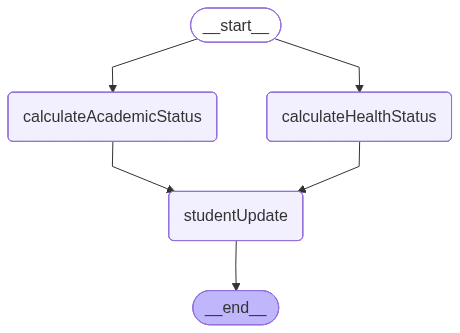

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())